In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [19]:
df["type"]=pd.DataFrame(iris.target)

In [21]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


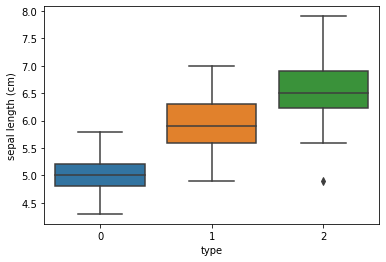

In [34]:
sns.boxplot(df["type"],df["sepal length (cm)"])

In [37]:
data=iris.data[:,:]
target=iris.target


In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.2,random_state=42)

In [44]:
xtest.shape

(30, 4)

In [49]:
#hyperparamter optimization
parameter={"C":[1,0.1,10,100],"gamma":[1,0.1,0.001,0.0001]}
grid=GridSearchCV(SVC(),parameter,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 0.1, 10, 100], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [54]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [58]:
#now we know the best parameter 
svm=SVC(C=10,gamma=0.1)
svm.fit(xtrain,ytrain)
predict_y=svm.predict(xtest)
print("predicted answers:",predict_y)
print("known answers    :",ytest)
print("Accuracy score   :",accuracy_score(predict_y,ytest))
print("confusion matrix :",confusion_matrix(predict_y,ytest))

predicted answers: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
known answers    : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy score   : 1.0
confusion matrix : [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
